# About Dataset

### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

### Content
The following Airbnb activity is included in this Boston dataset:

- Listings, including full descriptions and average review score

- Reviews, including unique id for each reviewer and detailed comments

- Calendar, including listing id and the price and availability for that day

## Stakeholder - Sales Manager

## Buisness Questions -

- ### What are the peak seasons for Airbnb rentals in Boston?
- ### What are the expensive and cheap neighbourhood in Boston?
- ### What are the most demanding amenities visitors prefer?
- ### What are the most reviewed neighbourhood?

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Listing data

In [2]:
listing = pd.read_csv("listings.csv")
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### Removing Unnecessary columns

In [5]:
dropcol=['listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url','xl_picture_url'
        ,'host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed']
listing.drop(dropcol, axis=1, inplace=True)

In [6]:
listing.shape

(3585, 84)

### Handling missing data and change datatype

In [7]:
total = listing.isnull().sum().sort_values(ascending=False)

In [8]:
percent = (listing.isnull().sum()/listing.isnull().count()).sort_values(ascending=False)

In [9]:
missing= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
missing.head(20)

,Total,Percent
has_availability,3585,1.000000
square_feet,3529,0.984379
monthly_price,2697,0.752301
weekly_price,2693,0.751185
security_deposit,2243,0.625662
notes,1975,0.550907
interaction,1554,0.433473
access,1489,0.415342
neighborhood_overview,1415,0.394700
host_about,1309,0.365132


In [11]:
#dropping columns which have higher missing values
missing_col = ['has_availability','square_feet','monthly_price','weekly_price','security_deposit','notes',
               'interaction','access','neighborhood_overview','host_about','transit','house_rules']
listing.drop(missing_col, axis=1, inplace=True)

In [12]:
# Replace missing values with 'Not provided' in summary, space, and description columns
columns_to_replace = ['summary', 'space', 'description']
listing[columns_to_replace] = listing[columns_to_replace].fillna('Not provided')

In [13]:
#host_response_rate, host_acceptance_rate is in percentage and data type is in object
#Convert host_response_rate and host_acceptance_rate columns to numeric type
listing['host_response_rate'] = pd.to_numeric(listing['host_response_rate'].str.replace('%', ''))
listing['host_acceptance_rate'] = pd.to_numeric(listing['host_acceptance_rate'].str.replace('%', ''))

# Handle missing values in host_response_rate and host_acceptance_rate
response_rate_median = listing['host_response_rate'].median()
acceptance_rate_median = listing['host_acceptance_rate'].median()
listing['host_response_rate'] = listing['host_response_rate'].fillna(response_rate_median)
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].fillna(acceptance_rate_median)

In [14]:
# Handle missing values in host_response_time
response_time_mode = listing['host_response_time'].mode()[0]
listing['host_response_time'] = listing['host_response_time'].fillna(response_time_mode)

# Handle missing values in host_location
location_mode = listing['host_location'].mode()[0]
listing['host_location'] = listing['host_location'].fillna(location_mode)

neighbourhood_mode = listing['host_neighbourhood'].mode()[0]
listing['host_neighbourhood'] = listing['host_neighbourhood'].fillna(neighbourhood_mode)
neighbourhood_mode = listing['neighbourhood'].mode()[0]
listing['neighbourhood'] = listing['neighbourhood'].fillna(neighbourhood_mode)
city_mode = listing['city'].mode()[0]
listing['city'] = listing['city'].fillna(city_mode)

In [15]:
# Convert 'cleaning_fee' column to string type
listing['cleaning_fee'] = listing['cleaning_fee'].astype(str)

# Replace '$' symbol with an empty string and convert to float
listing['cleaning_fee'] = listing['cleaning_fee'].str.replace('$', '').astype(float)

# Calculate the median of 'cleaning_fee'
cleaning_fee_median = listing['cleaning_fee'].median()

# Fill missing values with the median
listing['cleaning_fee'] = listing['cleaning_fee'].fillna(cleaning_fee_median)

C:\Users\USER\AppData\Local\Temp\ipykernel_20392\3674835703.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing['cleaning_fee'] = listing['cleaning_fee'].str.replace('$', '').astype(float)


In [16]:
#bathrooms_median = listing['bathrooms'].median()
#listing['bathrooms'] = listing['bathrooms'].fillna(bathrooms_median)
#bedrooms_median = listing['bedrooms'].median()
#listing['bedrooms'] = listing['bedrooms'].fillna(bedrooms_median)
#beds_median = listing['beds'].median()
#listing['beds'] = listing['beds'].fillna(beds_median)

columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin','bathrooms','bedrooms','beds',
           'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

for column in columns:
    median_value = listing[column].median()
    listing[column].fillna(median_value, inplace=True)

In [17]:
missing_values_count = listing.isnull().sum()
missing_values_count

id                                  0
last_scraped                        0
name                                0
summary                             0
space                               0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 72, dtype: int64

In [18]:
listing['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [19]:
listing['price'] = listing['price'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_20392\2722243337.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing['price'] = listing['price'].str.replace('$', '').str.replace(',', '').astype(float)


# Exploratory Data Analysis

In [20]:
listing[['price','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
           'review_scores_value', 'reviews_per_month']].describe()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,173.925802,92.389121,9.562064,9.427336,9.727197,9.727197,9.548396,9.129707,1.802014
std,148.331321,8.426451,0.852131,1.073125,0.686118,0.662954,0.830476,0.890595,1.911809
min,10.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,0.010000
25%,85.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.640000
50%,150.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.170000
75%,220.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.130000
max,4000.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.150000


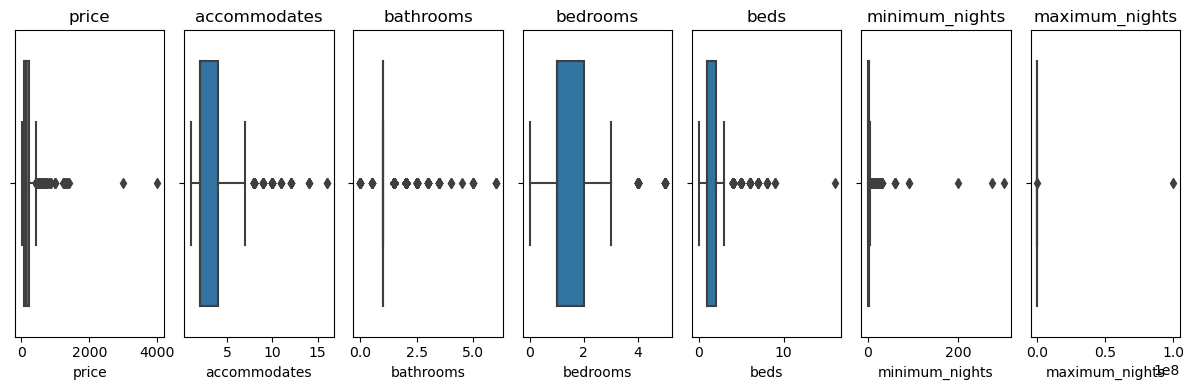

In [21]:
# Select numeric columns
numeric_columns = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds','minimum_nights','maximum_nights']

# Create box plots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 4))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=listing[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

There are outliers. Outliers in Price Should be concerning.

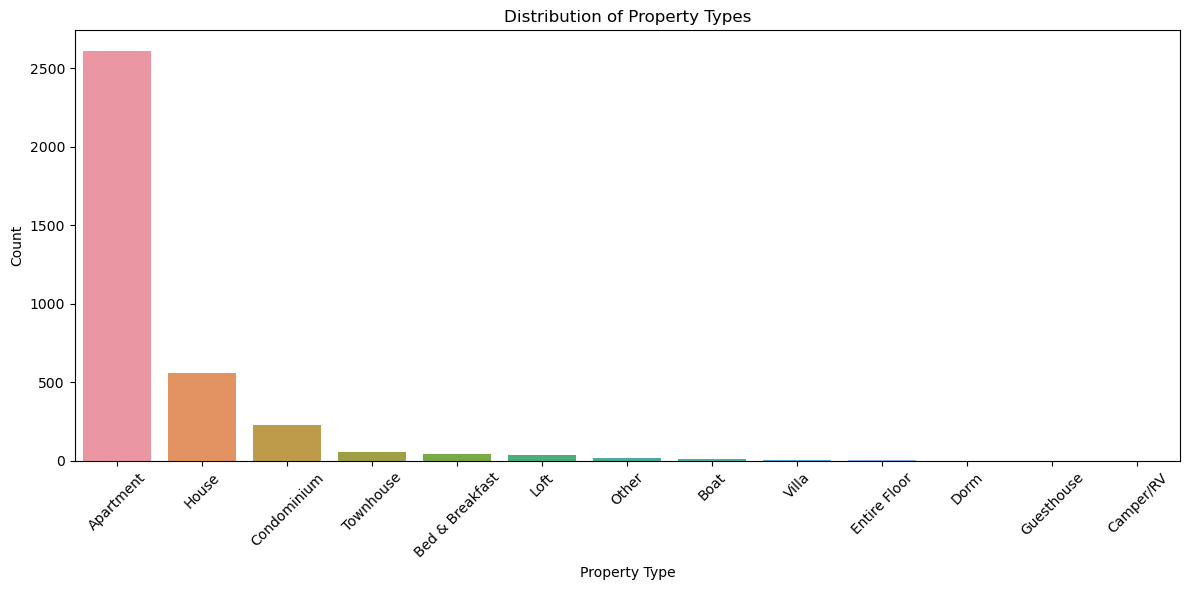

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each property type
property_counts = listing['property_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=property_counts.index, y=property_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.tight_layout()
plt.show()

Seems like apartments are more likely to be popular or busy than any other property type.

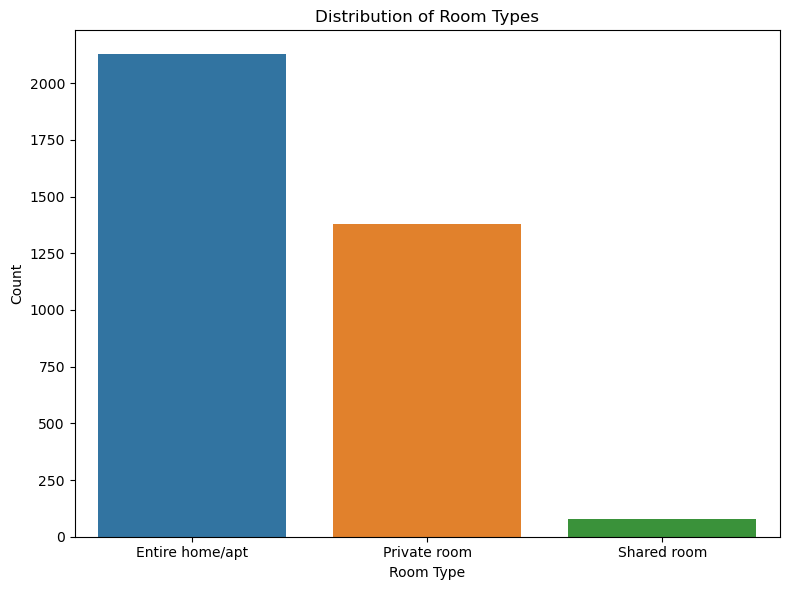

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each room type
room_counts = listing['room_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=room_counts.index, y=room_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
plt.tight_layout()
plt.show()

Consumers tends to select Airbnb with enitire home or appartrment.

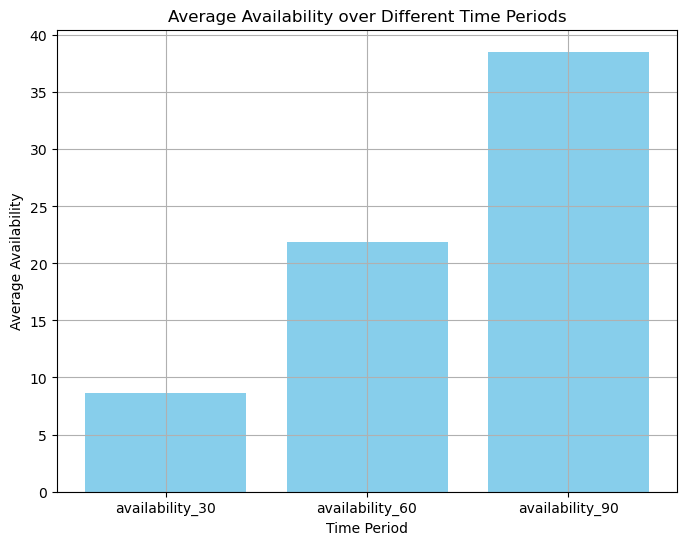

In [27]:
# Specify the time period columns
time_periods = ['availability_30', 'availability_60', 'availability_90']

# Calculate the average availability for each time period
average_availability = [listing[period].mean() for period in time_periods]

# Create a bar plot to visualize the average availability
plt.figure(figsize=(8, 6))
plt.bar(time_periods, average_availability, color='skyblue')
plt.title('Average Availability over Different Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Average Availability')
plt.grid(True)

# Show the plot
plt.show()

In [28]:
# Split the amenities into separate values and remove semicolons
amenities = listing['amenities'].str.replace('[{}"]', '').str.split(',')

# Flatten the list of amenities
amenities_flat = [amenity.strip() for sublist in amenities for amenity in sublist]

# Count the occurrences of each amenity
amenities_counts = pd.Series(amenities_flat).value_counts()

# Print the top 10 amenities and their counts
top_amenities = amenities_counts.head(20)
print(top_amenities)

Wireless Internet            3421
Heating                      3384
Kitchen                      3284
Essentials                   2994
Smoke Detector               2911
Air Conditioning             2821
TV                           2607
Internet                     2577
Dryer                        2476
Washer                       2475
Carbon Monoxide Detector     2442
Shampoo                      2421
Hangers                      1985
Family/Kid Friendly          1888
Laptop Friendly Workspace    1834
Iron                         1828
Hair Dryer                   1811
Cable TV                     1770
Fire Extinguisher            1582
24-Hour Check-in             1247
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_20392\4049214220.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities = listing['amenities'].str.replace('[{}"]', '').str.split(',')


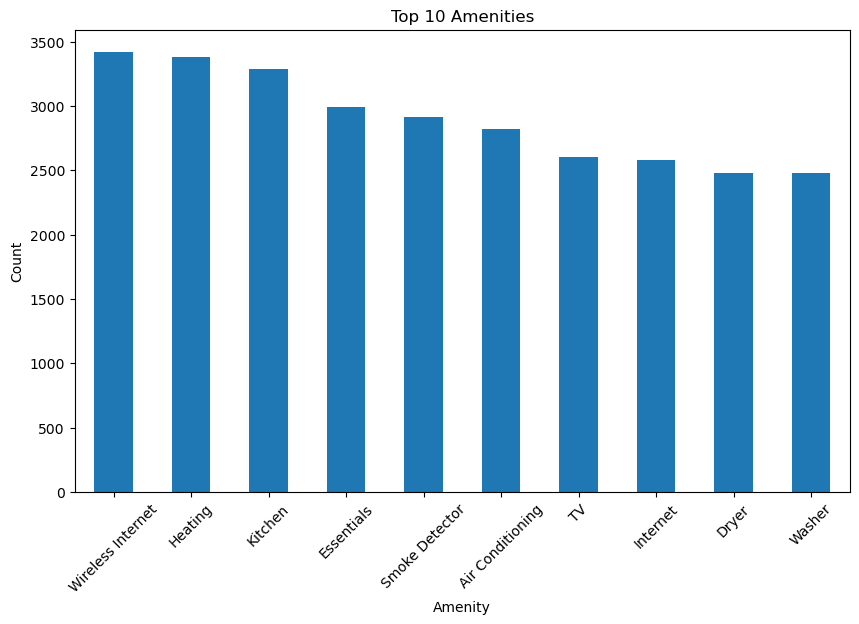

In [29]:
top_amenities = amenities_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_amenities.plot(kind='bar')
plt.title('Top 10 Amenities')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

These are are most essential amenities people use and prefer.

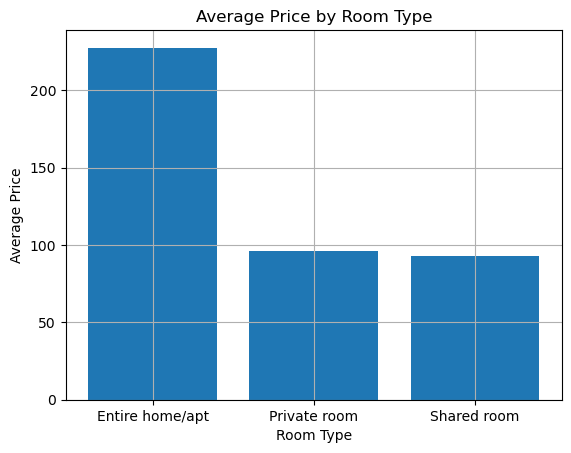

In [30]:
average_price_by_room_type = listing.groupby('room_type')['price'].mean()

plt.bar(average_price_by_room_type.index, average_price_by_room_type)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.grid(True)
plt.show()

Average price of Entire home is more than 200 $ where as private rooms and shared rooms are mostly  of same price. 

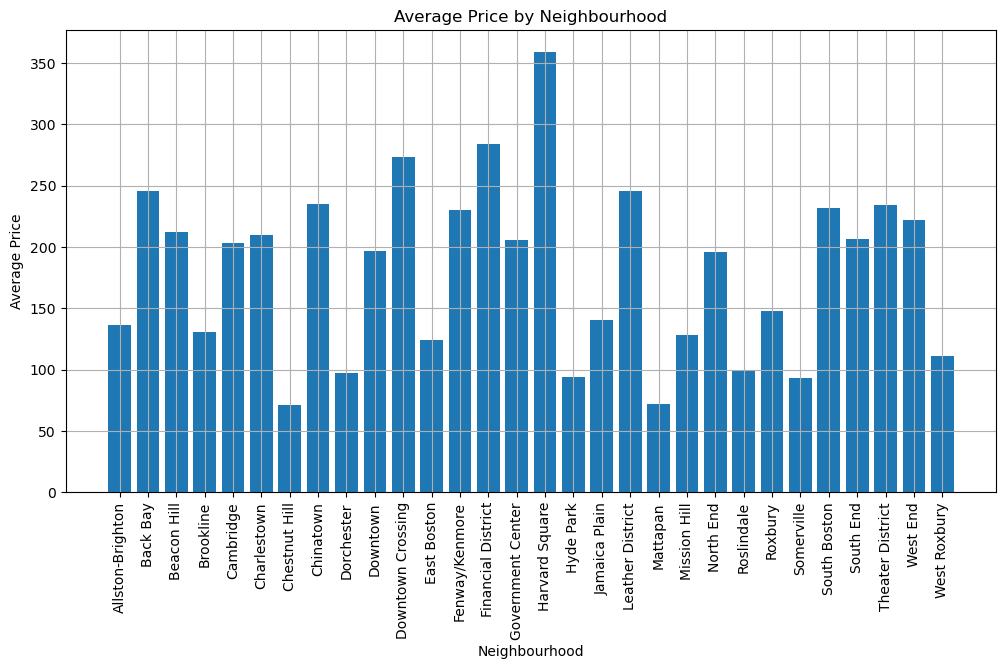

In [31]:
average_price_by_neighbourhood = listing.groupby('neighbourhood')['price'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_price_by_neighbourhood.index, average_price_by_neighbourhood)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Harvard Square seems to be the most expensive neighbourhood among all with an average price exceeding 350$.

In [32]:
columns = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds']

# Subset the DataFrame with the selected columns
subset = listing[columns]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Display the correlation matrix as a table
corr_table = corr_matrix.round(2)

# Show the table
print(corr_table)

              price  accommodates  bathrooms  bedrooms  beds
price          1.00          0.44       0.25      0.38  0.37
accommodates   0.44          1.00       0.35      0.72  0.82
bathrooms      0.25          0.35       1.00      0.43  0.35
bedrooms       0.38          0.72       0.43      1.00  0.71
beds           0.37          0.82       0.35      0.71  1.00


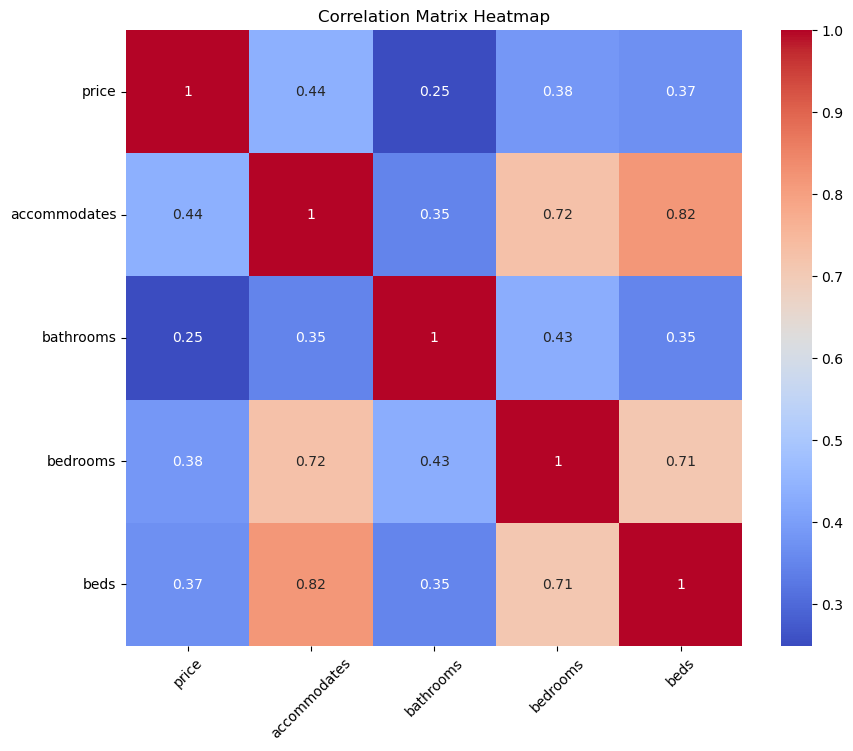

In [33]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

# Calendar data

In [34]:
calendar=pd.read_csv("calendar.csv")
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [35]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [36]:
missing_percentage = (calendar.isnull().sum() / len(calendar)) * 100
print(missing_percentage)

listing_id     0.000000
date           0.000000
available      0.000000
price         50.871578
dtype: float64


In [37]:
calendar['available'] = calendar['available'].replace({'f': 'no', 't': 'yes'})

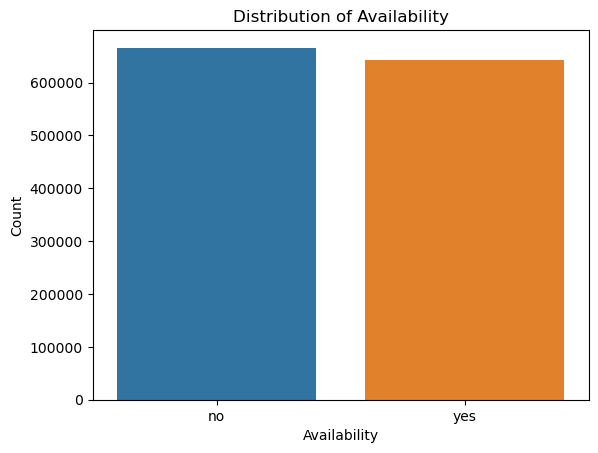

In [38]:
sns.countplot(x='available', data=calendar)
plt.xlabel('Availability')
plt.ylabel('Count')
plt.title('Distribution of Availability')
plt.show()

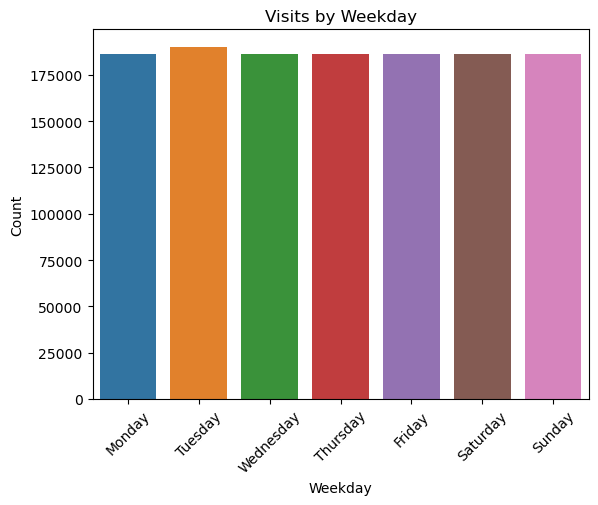

In [39]:
# Convert 'date' column to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract weekday from 'date' column
calendar['weekday'] = calendar['date'].dt.day_name()

# Create countplot of weekdays
sns.countplot(x='weekday', data=calendar, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Visits by Weekday')
plt.xticks(rotation=45)
plt.show()

Boston Airbnb are similarly busy all over the weekdays.

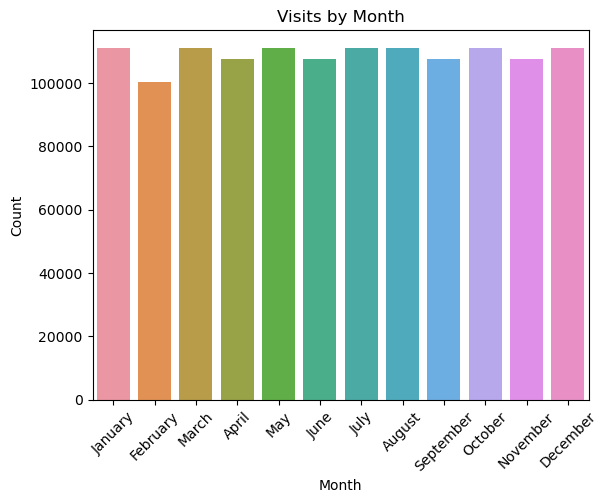

In [40]:
# Extract month from 'date' column
calendar['month'] = calendar['date'].dt.month_name()

# Create countplot of months
sns.countplot(x='month', data=calendar, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                                               'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Visits by Month')
plt.xticks(rotation=45)
plt.show()

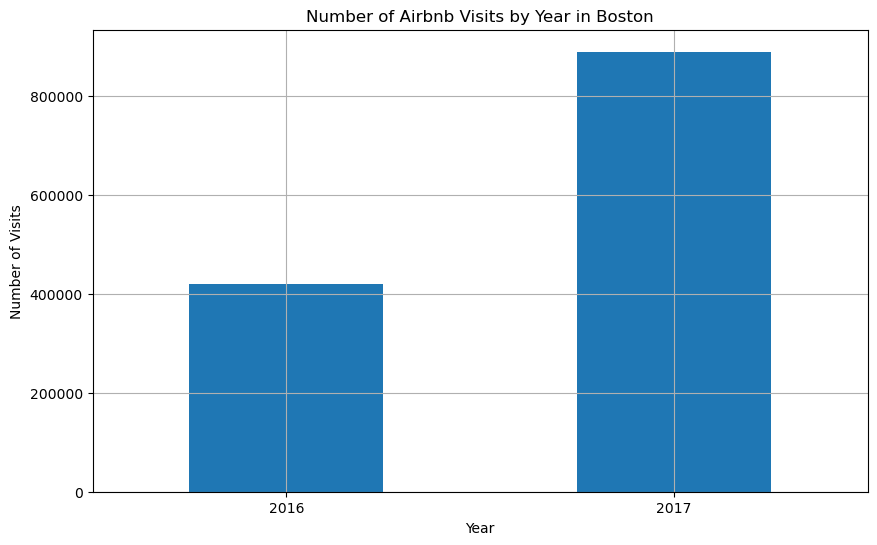

In [41]:
# Extract the year from the 'date' column
calendar['year'] = pd.to_datetime(calendar['date']).dt.year

# Count the number of visits for each year
visits_by_year = calendar['year'].value_counts().sort_index()

# Plot the visits by year
visits_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.title('Number of Airbnb Visits by Year in Boston')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

The visits have comperatively incresed in 2017 than 2016. The revenue had also increased as a result.

In [42]:
calendar['year'].value_counts()

2017    889328
2016    419562
Name: year, dtype: int64

In [43]:
calendar_filtered = calendar[calendar['year'] == 2017]

In [44]:
calendar_filtered['year'].value_counts()

2017    889328
Name: year, dtype: int64

In [45]:
calendar_filtered.to_excel('Airbnb_calendar.xlsx', index=False)

There is a huge increase in number of visitors from 2016 to 2017. This also helped in growth of the company as well as revenew. 

# Reviews data

In [46]:
reviews= pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [47]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


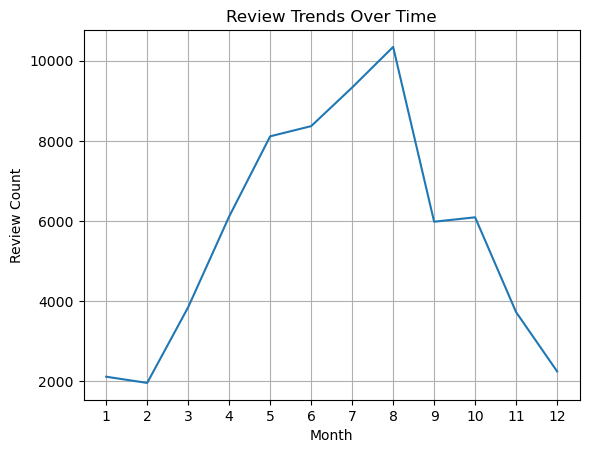

In [48]:
# Convert the 'date' column to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Group the reviews by month and count the number of reviews
review_counts = reviews.groupby(reviews['date'].dt.month)['listing_id'].count()

# Plot a line chart of review counts over time
plt.plot(review_counts.index, review_counts.values)
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.title('Review Trends Over Time')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

The trends shows that reviews are much higher in the month of July and August which is corelated to the number of vistis. Higher rates of visits increases in Review count.

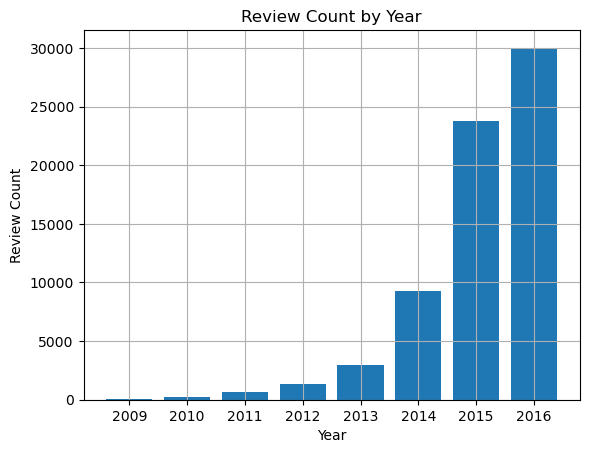

In [49]:
# Convert the 'date' column to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Extract the year from the 'date' column
reviews['year'] = reviews['date'].dt.year

# Count the number of reviews per year
review_count_by_year = reviews['year'].value_counts().sort_index()

# Plot a bar chart of review count by year
plt.bar(review_count_by_year.index, review_count_by_year.values)
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Review Count by Year')
plt.xticks(review_count_by_year.index)
plt.grid(True)
plt.show()

# Answering business problems

### What are the peak seasons for Airbnb rentals in Boston?

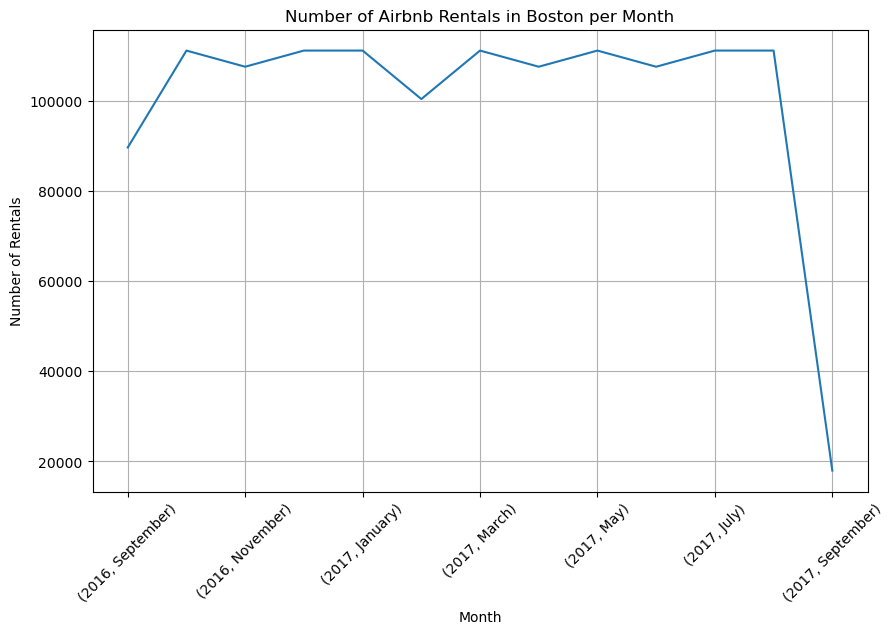

In [50]:
# Convert 'date' column to datetime data type
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract month and year from the 'date' column
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year

# Calculate the number of rentals for each month
rentals_per_month = calendar.groupby(['year', 'month'])['listing_id'].count()

# Define a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert month number to month name
rentals_per_month.index = rentals_per_month.index.set_levels(
    rentals_per_month.index.levels[1].map(lambda x: month_names[x]), level=1)

# Plot the number of rentals per month
rentals_per_month.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Number of Airbnb Rentals in Boston per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### What are the expensive and cheap neighbourhood in Boston?

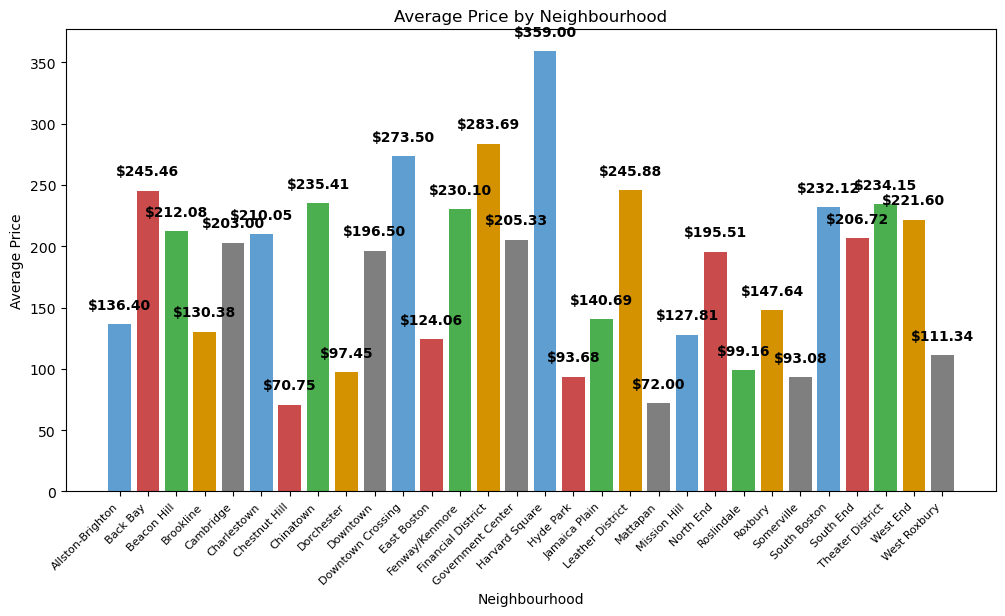

In [51]:
average_price_by_neighbourhood = listing.groupby('neighbourhood')['price'].mean()

plt.figure(figsize=(12, 6))

# Define a color palette
color_palette = ['#5f9ed1', '#ca4b4b', '#4baf4f', '#d49100', '#7f7f7f']

# Plot the bar chart with colored bars
plt.bar(average_price_by_neighbourhood.index, average_price_by_neighbourhood, color=color_palette)

# Add labels to the bars
for i, price in enumerate(average_price_by_neighbourhood):
    plt.text(i, price + 10, f"${price:.2f}", ha='center', va='bottom', fontweight='bold')

plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood')
plt.xticks(rotation=45, ha='right', fontsize=8)

# Remove grid lines
plt.grid(False)

plt.show()

### What are the most demanding amenities visitors prefer?

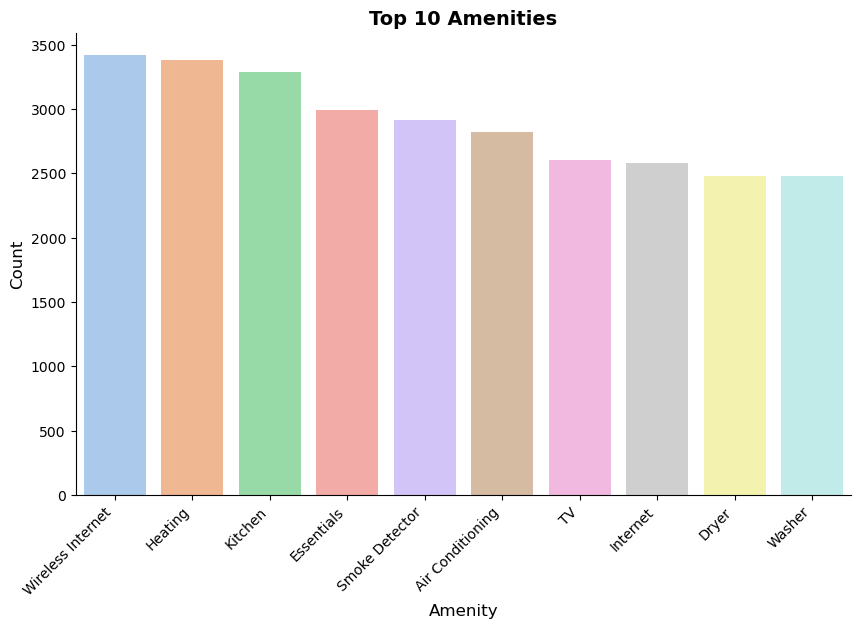

In [52]:
top_amenities = amenities_counts.head(10)

# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Create a bar plot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=top_amenities.index, y=top_amenities, palette=custom_palette)

# Set plot title and axis labels
plt.title('Top 10 Amenities', fontsize=14, fontweight='bold')
plt.xlabel('Amenity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Remove top and right spines of the plot
sns.despine()

# Display the plot
plt.show()

### What are the most reviewed neighbourhood?

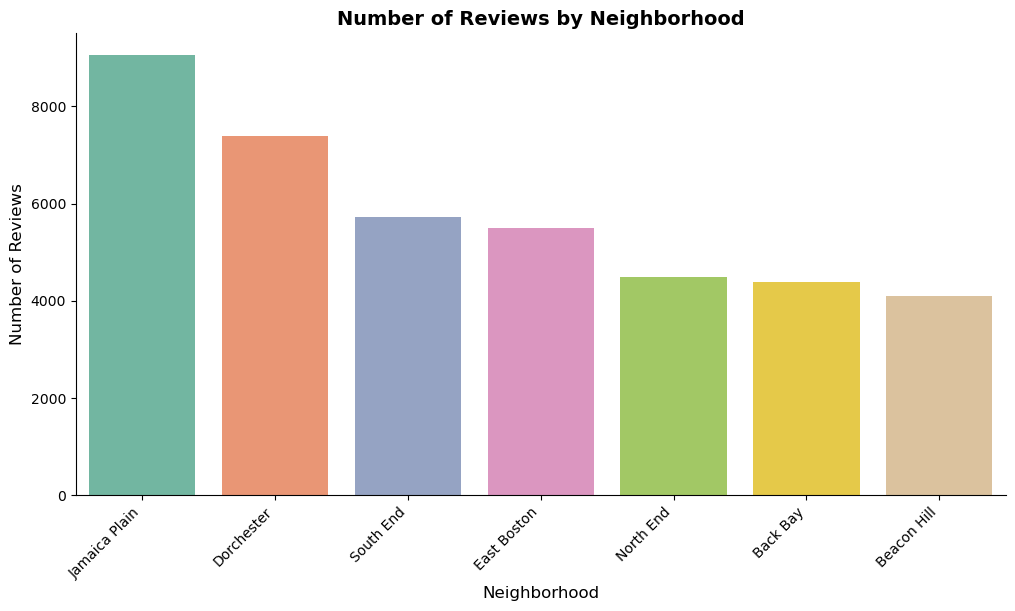

In [53]:
# Group the listings by neighborhood and count the number of reviews
reviews_count_by_neighborhood = listing.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

# Sort the neighborhoods by the number of reviews in descending order
reviews_count_by_neighborhood = reviews_count_by_neighborhood.sort_values(ascending=False).head(7)

# Set a different color palette
custom_palette = sns.color_palette("Set2")

# Create a bar plot with customized aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x=reviews_count_by_neighborhood.index, y=reviews_count_by_neighborhood, palette=custom_palette)

# Set plot title and axis labels
plt.title('Number of Reviews by Neighborhood', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Remove top and right spines of the plot
sns.despine()

# Display the plot
plt.show()

## Building the baseline Model

In [54]:
listing.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_

In [55]:
# Dropping unecessery columns
columns_to_drop = ['id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'host_id',
                   'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate',
                   'host_acceptance_rate', 'host_neighbourhood', 'host_verifications', 'street', 'neighbourhood',
                   'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude',
                   'longitude', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90',
                   'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value', 'cancellation_policy',
                   'calculated_host_listings_count', 'reviews_per_month']

listing_encoded = listing.drop(columns_to_drop, axis=1)

In [56]:
listing_encoded[['host_listings_count', 'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
                     'review_scores_rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_listings_count        3585 non-null   int64  
 1   host_total_listings_count  3585 non-null   int64  
 2   accommodates               3585 non-null   int64  
 3   bathrooms                  3585 non-null   float64
 4   bedrooms                   3585 non-null   float64
 5   beds                       3585 non-null   float64
 6   price                      3585 non-null   float64
 7   guests_included            3585 non-null   int64  
 8   number_of_reviews          3585 non-null   int64  
 9   review_scores_rating       3585 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 280.2 KB


## Encoding features

In [57]:
# Select the categorical columns
categorical_columns = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']

# Perform one-hot encoding
listing_encoded = pd.get_dummies(listing_encoded, columns=categorical_columns)

# Display the encoded dataset
print(listing_encoded.head())

  host_is_superhost  host_listings_count  host_total_listings_count  \
0                 f                    1                          1   
1                 f                    1                          1   
2                 t                    1                          1   
3                 f                    1                          1   
4                 t                    1                          1   

  host_has_profile_pic host_identity_verified is_location_exact  accommodates  \
0                    t                      f                 t             4   
1                    t                      t                 t             2   
2                    t                      t                 t             2   
3                    t                      f                 f             4   
4                    t                      t                 t             2   

   bathrooms  bedrooms  beds  ... property_type_Townhouse  \
0        1.5       2.0   

In [58]:
listing_encoded[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']].head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,is_location_exact,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,f,f,t,t,f,f,f,f
1,f,t,t,t,f,t,f,f
2,t,t,t,t,f,f,t,f
3,f,f,t,f,f,f,f,f
4,t,t,t,t,f,f,f,f


In [59]:
import category_encoders as ce

# Select the binary columns
binary_columns = ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                  'is_location_exact', 'requires_license', 'instant_bookable',
                  'require_guest_profile_picture', 'require_guest_phone_verification']

# Perform binary encoding
encoder = ce.BinaryEncoder(cols=binary_columns)
listing_encoded = encoder.fit_transform(listing_encoded)

# Display the encoded dataset
print(listing_encoded.head())

   host_is_superhost_0  host_is_superhost_1  host_listings_count  \
0                    0                    1                    1   
1                    0                    1                    1   
2                    1                    0                    1   
3                    0                    1                    1   
4                    1                    0                    1   

   host_total_listings_count  host_has_profile_pic_0  host_has_profile_pic_1  \
0                          1                       0                       1   
1                          1                       0                       1   
2                          1                       0                       1   
3                          1                       0                       1   
4                          1                       0                       1   

   host_identity_verified_0  host_identity_verified_1  is_location_exact_0  \
0                         0     

In [60]:
listing_encoded['amenities'].head()

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [61]:
# Split the amenities column into separate values
amenities = listing_encoded['amenities'].str.strip('{}').str.replace('"', '').str.split(',')

# Create a set of unique amenities
unique_amenities = set()
for item in amenities:
    unique_amenities.update(item)

# Create new columns for each unique amenity and initialize them with zeros
for amenity in unique_amenities:
    listing_encoded[amenity] = 0

# Set 1 for the corresponding amenity in each row
for i, item in enumerate(amenities):
    listing_encoded.loc[i, item] = 1

# Drop the original amenities column
listing_encoded.drop('amenities', axis=1, inplace=True)

In [62]:
listing_encoded.columns

Index(['host_is_superhost_0', 'host_is_superhost_1', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic_0',
       'host_has_profile_pic_1', 'host_identity_verified_0',
       'host_identity_verified_1', 'is_location_exact_0',
       'is_location_exact_1',
       ...
       'Suitable for Events', '24-Hour Check-in', 'Smoke Detector',
       'Buzzer/Wireless Intercom', 'Air Conditioning', 'Washer', 'Shampoo',
       'First Aid Kit', 'Safety Card', 'Pool'],
      dtype='object', length=121)

In [63]:
listing_encoded.head()

,host_is_superhost_0,host_is_superhost_1,host_listings_count,host_total_listings_count,host_has_profile_pic_0,host_has_profile_pic_1,host_identity_verified_0,host_identity_verified_1,is_location_exact_0,is_location_exact_1,...,Suitable for Events,24-Hour Check-in,Smoke Detector,Buzzer/Wireless Intercom,Air Conditioning,Washer,Shampoo,First Aid Kit,Safety Card,Pool
0,0,1,1,1,0,1,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
1,0,1,1,1,0,1,1,0,0,1,...,0,0,1,0,1,1,1,0,0,0
2,1,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,1,1,1,1,0
3,0,1,1,1,0,1,0,1,1,0,...,0,0,1,0,1,1,1,1,1,0
4,1,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,1,1,0,0


In [64]:
# Iterate over the columns
for column in listing_encoded.columns:
    # Check if the data type is object
    if listing_encoded[column].dtype == 'object':
        # Print the column name and its values
        print(f"Column: {column}")
        print(listing_encoded[column])

Column: extra_people
0        $0.00
1        $0.00
2       $20.00
3       $25.00
4        $0.00
         ...  
3580    $24.00
3581     $0.00
3582     $0.00
3583    $30.00
3584    $30.00
Name: extra_people, Length: 3585, dtype: object


In [65]:
# Remove the dollar sign from the values in 'extra_people' column
listing_encoded['extra_people'] = listing_encoded['extra_people'].str.replace('$', '')

# Convert the 'extra_people' column to numeric
listing_encoded['extra_people'] = pd.to_numeric(listing_encoded['extra_people'])

C:\Users\USER\AppData\Local\Temp\ipykernel_20392\371114288.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listing_encoded['extra_people'] = listing_encoded['extra_people'].str.replace('$', '')


## Handling Skewness

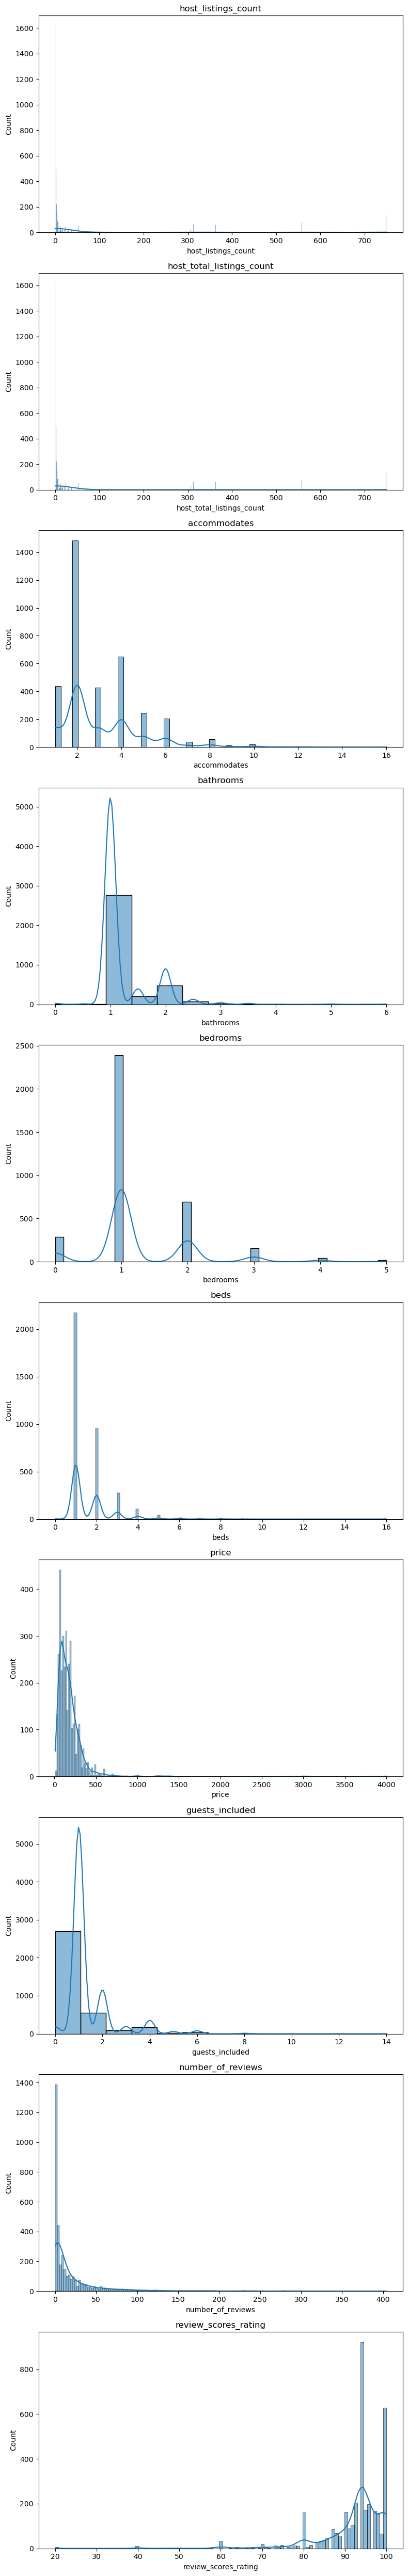

In [67]:
# Select the columns to visualize
columns = ['host_listings_count', 'host_total_listings_count', 'accommodates', 
           'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
           'review_scores_rating']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 5 * len(columns)))

# Plot histograms or density plots
for i, col in enumerate(columns):
    sns.histplot(data=listing_encoded, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
# Apply logarithmic transformation to selected columns
columns = ['host_listings_count', 'host_total_listings_count', 'accommodates', 
           'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'number_of_reviews',
           'review_scores_rating']

listing_encoded[columns] = np.log1p(listing_encoded[columns])

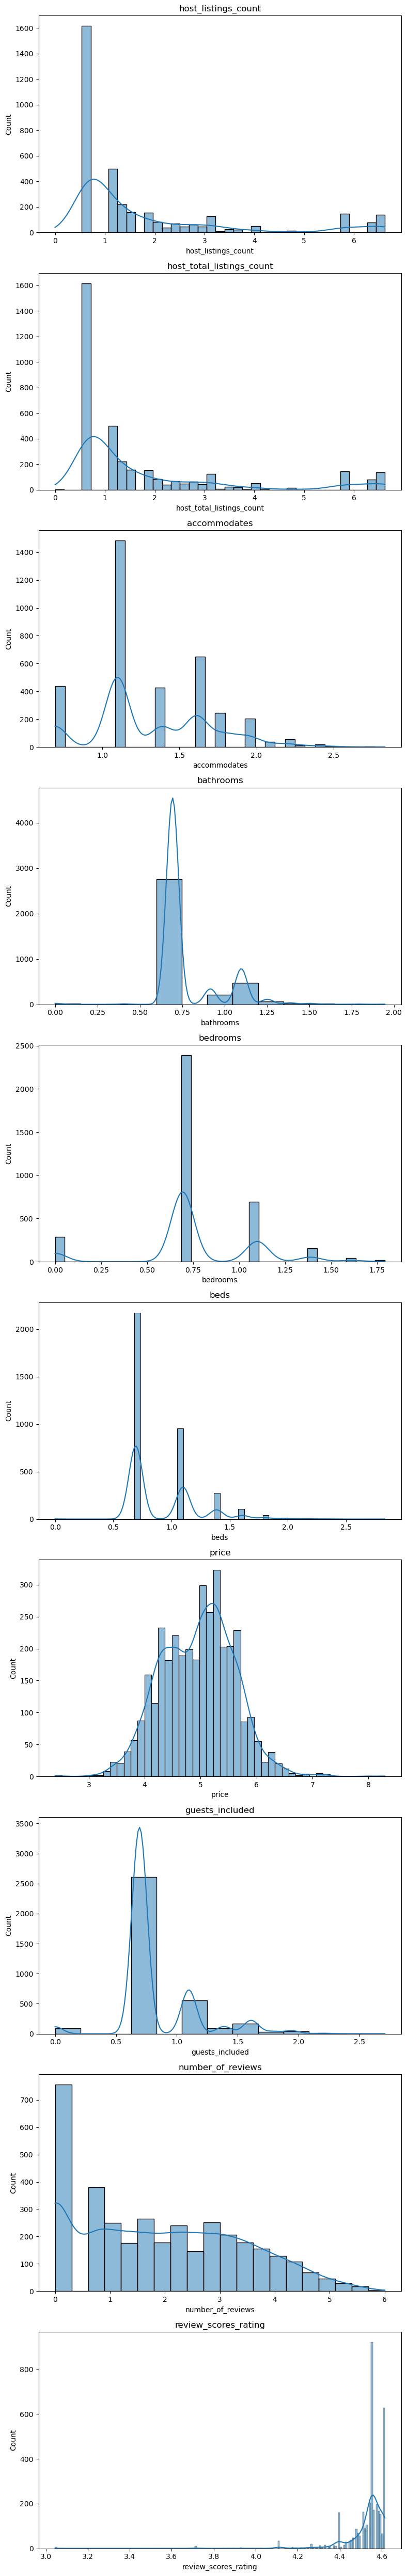

In [69]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 5 * len(columns)))

# Plot histograms or density plots
for i, col in enumerate(columns):
    sns.histplot(data=listing_encoded, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


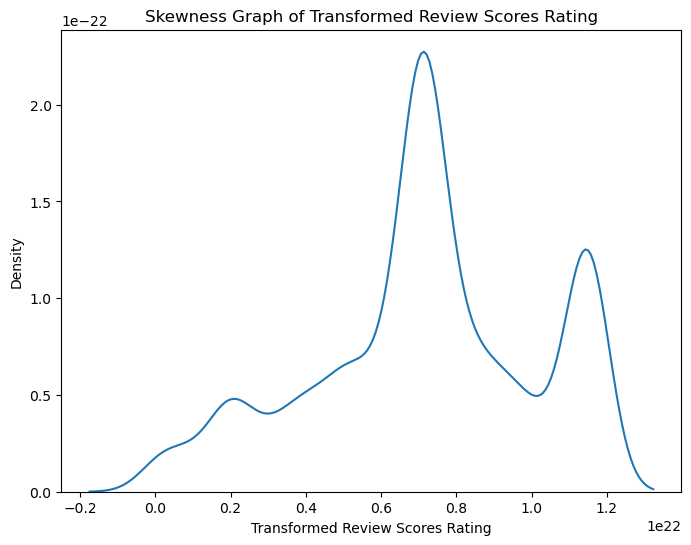

In [70]:
from scipy import stats

# Apply Box-Cox transformation to 'review_scores_rating' column
transformed_rating, lambda_value = stats.boxcox(listing_encoded['review_scores_rating'])

# Plot the skewness graph for the transformed column
plt.figure(figsize=(8, 6))
sns.distplot(transformed_rating, hist=False, kde=True)
plt.xlabel('Transformed Review Scores Rating')
plt.ylabel('Density')
plt.title('Skewness Graph of Transformed Review Scores Rating')
plt.show()

## Baseline Model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = listing_encoded.drop('price', axis=1)
y = listing_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Root Mean Squared Error: 0.35582893979789587
Mean Squared Error: 0.12661423439769462
R-squared: 0.6995142982560785


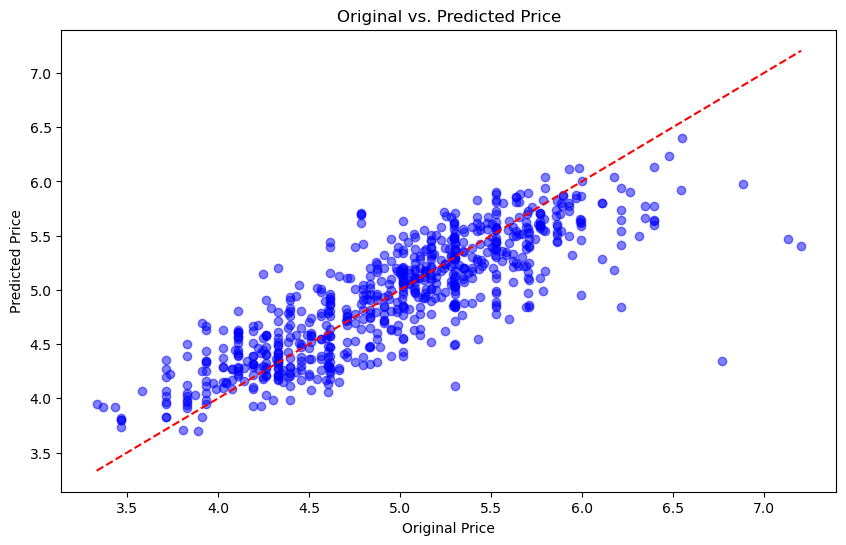

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original vs. Predicted Price')
plt.show()

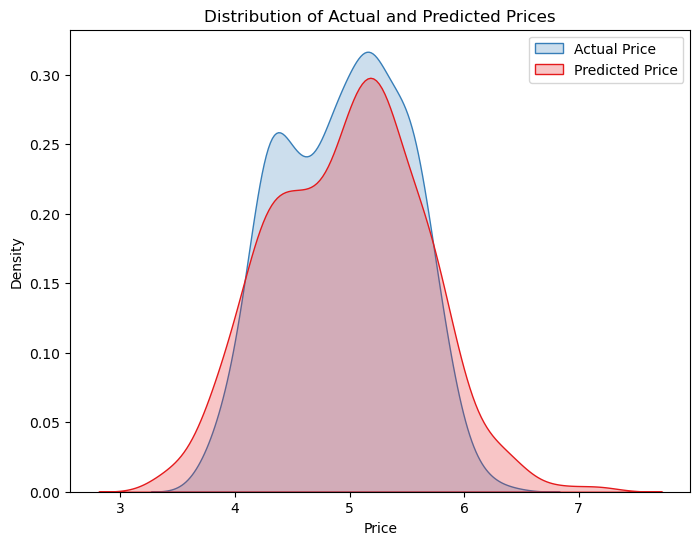

In [75]:
# Concatenate the actual and predicted prices into a single DataFrame
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Plot the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, fill=True, palette='Set1')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted Prices')
plt.legend(labels=['Actual Price', 'Predicted Price'])
plt.show()

## Comparing other models

In [76]:
from sklearn.ensemble import BaggingRegressor

# Create a bagging ensemble of linear regression models
bagging_model = BaggingRegressor(model, n_estimators=10, random_state=42)

# Fit the bagging model to the training data
bagging_model.fit(X_train, y_train)

# Predict using the bagging model
y_pred = bagging_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("rmse:",rmse)

R-squared score: 0.7010722397125828
rmse: 0.3549053000425553


In [77]:
from sklearn.linear_model import Lasso

# Define a list of alpha values to try
alpha_values = [0.001,0.005, 0.01,  0.03, 0.04, 0.05, 0.1, 1.0, 10.0]

# Iterate through each alpha value
for alpha in alpha_values:
    # Create a Lasso regression model with the current alpha value
    model = Lasso(alpha=alpha)
    
    # Train the Lasso model
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)
    
     # Calculate the RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Alpha: {alpha}, R-squared score: {r2}, RMSE: {rmse}")

Alpha: 0.001, R-squared score: 0.697361314935258, RMSE: 0.35710142363774205
Alpha: 0.005, R-squared score: 0.6679072812839426, RMSE: 0.3740753041435678
Alpha: 0.01, R-squared score: 0.6348982426915484, RMSE: 0.39222594909097946
Alpha: 0.03, R-squared score: 0.5493485673546954, RMSE: 0.4357623847011796
Alpha: 0.04, R-squared score: 0.5155926273422264, RMSE: 0.451788043443107
Alpha: 0.05, R-squared score: 0.49358126136035463, RMSE: 0.46193859012025257
Alpha: 0.1, R-squared score: 0.37092529484223813, RMSE: 0.514849709794372
Alpha: 1.0, R-squared score: 0.19866163632970935, RMSE: 0.5810818738398732
Alpha: 10.0, R-squared score: 0.06939202927444732, RMSE: 0.6261995409380472


In [78]:
import xgboost as xgb

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost linear regression
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost linear regression model
model = xgb.train(params, dtrain)

# Make predictions using the trained model
y_pred = model.predict(dtest)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("rmse:",rmse)

R-squared score: 0.6354137357213037
rmse: 0.39194895622808545


## Conclusion

After comparing all the models, Bagging Regressor model from sklearn ensemble works best. giving a result- 
- R-squared score: 0.7010722397125828
- rmse: 0.3549053000425553

The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the target variable (in this case, the predicted price).

The RMSE is a measure of the average deviation between the predicted values and the actual values.